In [260]:
import qutip as qt
import numpy as np
import tqdm
import time
import warnings
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec
import sys
import yaml

sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')
import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

# Analyze the role of decoherence in the simulations

## Define parameters of simulation

In [261]:
# Define parameters
N=5
lmd = 0.02272
J = 0.5

state_dictionary = {"1":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

T2 = 1e6
gamma = 1/T2 # sqrt(gamma) is in the decoherence operators, gamma has units of 1/T. if gamma = 0.01, T2=100ns

dephasing_rates = [gamma]*N

print("System size:", N)
print("J = ", J, "  λ = ", lmd)
print("Simulation time:", tf)

System size: 5
J =  0.5   λ =  0.02272
Simulation time: 138.27432454180428


## Define simulation scheme

In [262]:
one_step_if_dw = True
encoding = 'dw'

if encoding == 'dw':
    mode = "transport"
    one_step = one_step_if_dw
elif encoding == 'st':
    mode = "standard"
    one_step = False

## Initialize objects

In [263]:
initial_state, target_state, reg_size = md.initialize_system(state_dictionary, N, encoding='dw', one_step=one_step)

H_t = Ham.Hamiltonian(
        system_size=N,
    mode=mode,
    lambda_factor=lmd,
    global_J=J,
    register_size=reg_size,
    j_error=0,
    l_error=0, 
    z_error=0
)

if one_step == False:
    H_r = Ham.Hamiltonian(
            system_size=N,
        mode="reset",
        lambda_factor=lmd,
        global_J=J,
        register_size=reg_size,
        j_error=0,
        l_error=0, 
        z_error=0
)


## Simulation and plots

In [264]:
if (one_step == True) or (encoding == 'st'):
    fidelity, observables, corr_f = dyn.OneStepAlgorithm(initial_state, target_state, H_t, ti, tf, Nsteps, dephasing_rates)
elif one_step == False:
    fidelity, observables = dyn.TwoStepAlgorithm(initial_state, target_state, H_t, H_r, ti, tf, Nsteps)

In [265]:
sizes = [6,   7, 8,  9,  10]
times = [0.6, 3, 14, 65, 415]

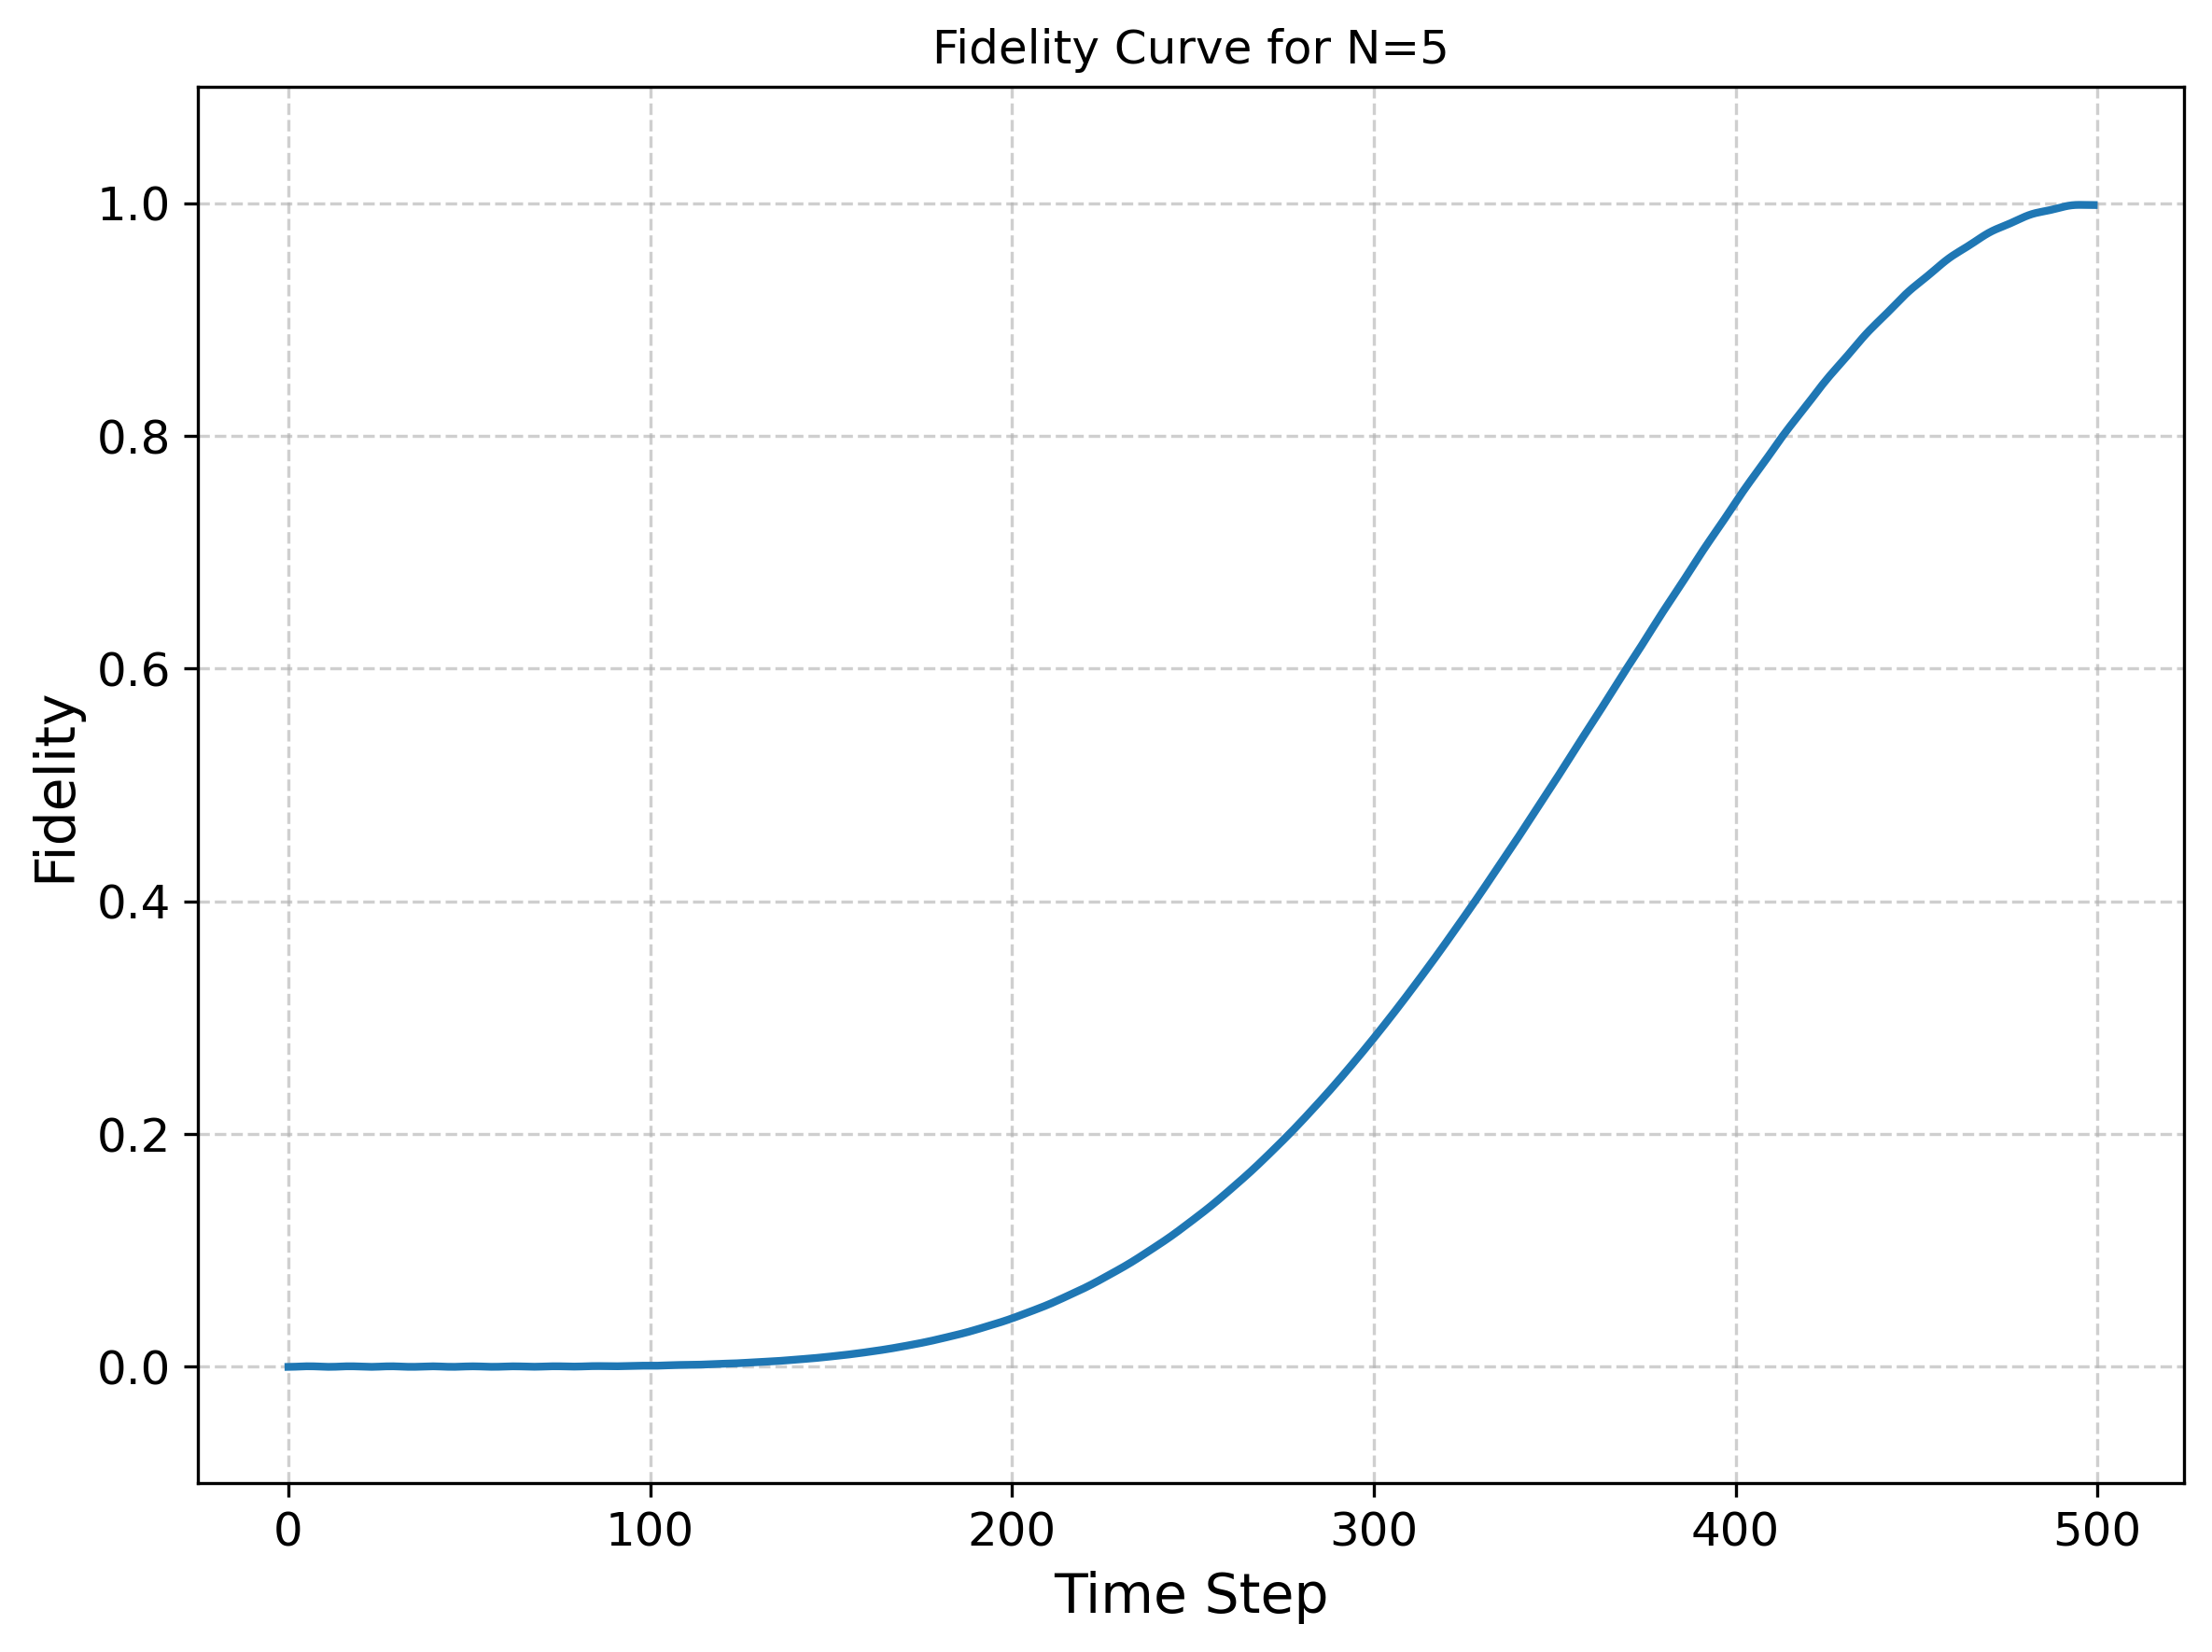

In [266]:
plots.plot_fidelity(fidelity, N)

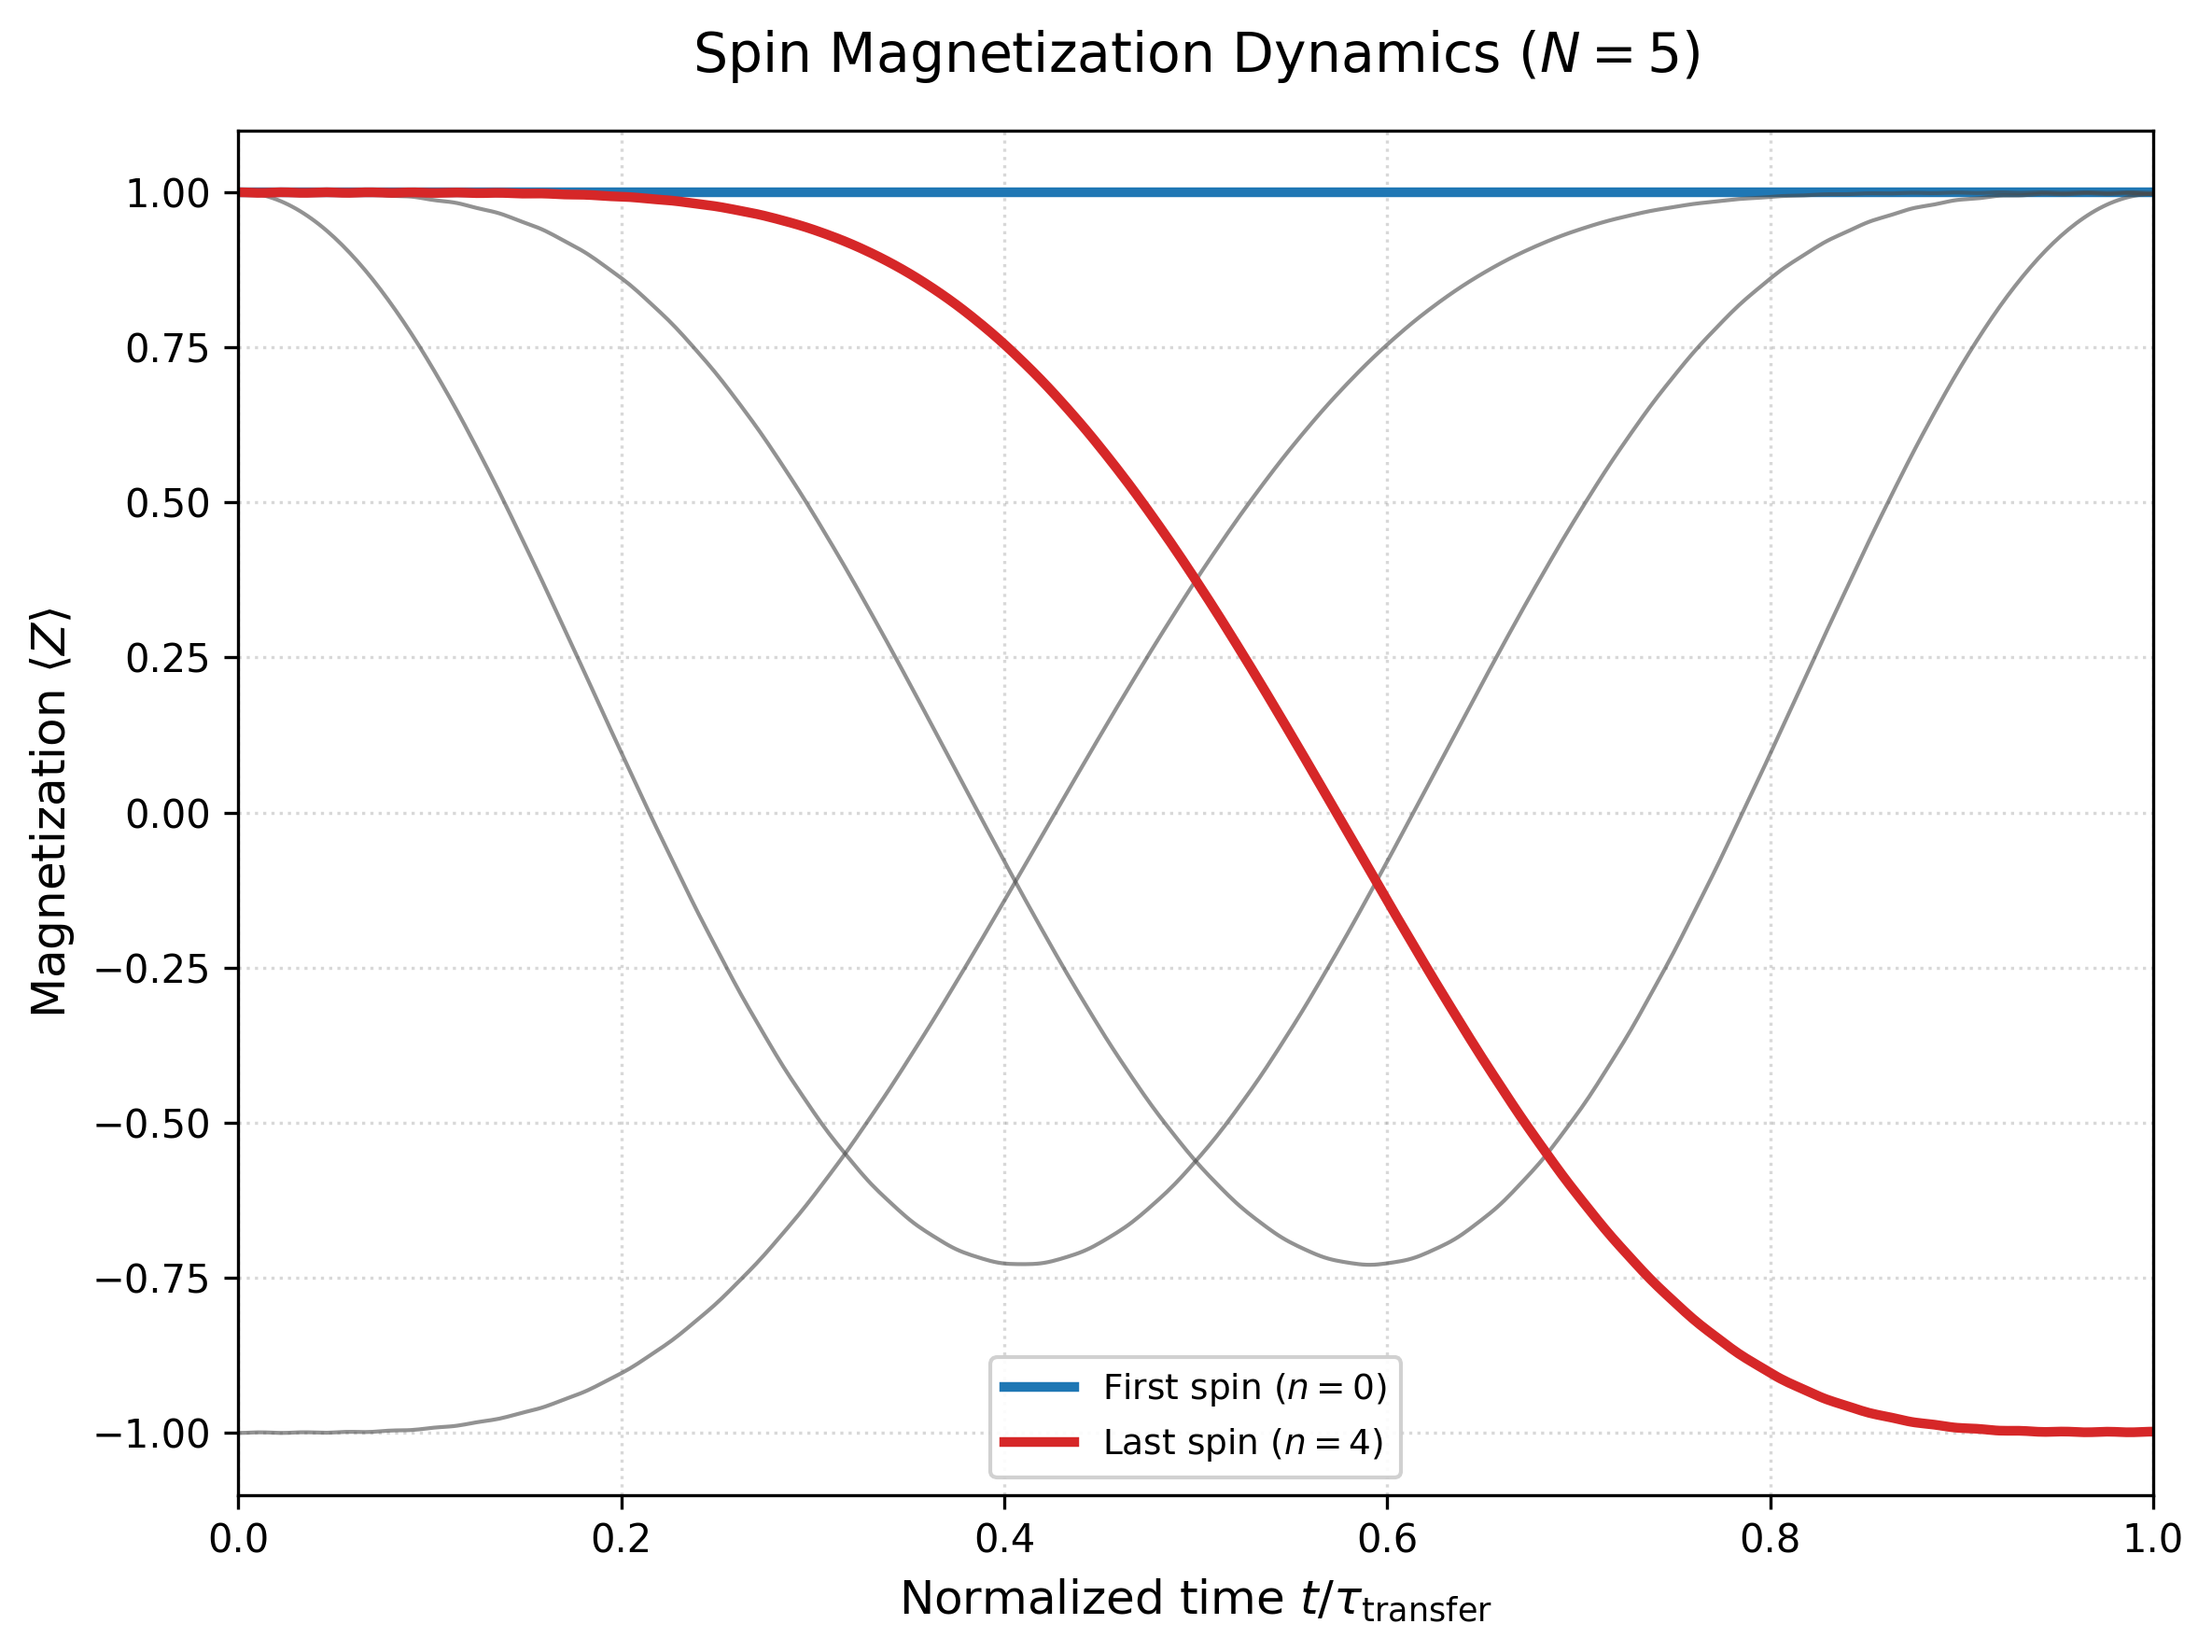

In [267]:
plots.plot_expectations(observables['Sz'], N)

## Loop over decoherences

In [320]:
N = 6

lmd = 0.1
J = 0.5

dec_times = [20, 50, 100, 200, 300, 500, 700, 1000, 2000, 3000, 5000, 7000, 10000, 20000, 30000, 50000, 70000, 100000, 200000, 300000, 500000, 700000, 1000000]

state_dictionary = {"1":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

one_step_if_dw = True
encoding = 'dw'

In [321]:
if encoding == 'dw':
    mode = "transport"
    one_step = one_step_if_dw
elif encoding == 'st':
    mode = "standard"
    one_step = False

initial_state, target_state, reg_size = md.initialize_system(state_dictionary, N, encoding='dw', one_step=one_step)

H_t = Ham.Hamiltonian(
        system_size=N,
    mode=mode,
    lambda_factor=lmd,
    global_J=J,
    register_size=reg_size,
    j_error=0,
    l_error=0, 
    z_error=0
)

if one_step == False:
    H_r = Ham.Hamiltonian(
            system_size=N,
        mode="reset",
        lambda_factor=lmd,
        global_J=J,
        register_size=reg_size,
        j_error=0,
        l_error=0, 
        z_error=0
)

In [322]:
final_fidelities = []

#Make exmaple without dephasing
fidelity, observables, corr_f = dyn.OneStepAlgorithm(initial_state, target_state, H_t, ti, tf, Nsteps)
final_fidelities.append(fidelity[-1])

for T2 in dec_times:

    gamma = 1/T2
    dephasing_rates = [gamma]*N

    if (one_step == True) or (encoding == 'st'):
        fidelity, observables, corr_f = dyn.OneStepAlgorithm(initial_state, target_state, H_t, ti, tf, Nsteps, dephasing_rates)
    elif one_step == False:
        fidelity, observables = dyn.TwoStepAlgorithm(initial_state, target_state, H_t, H_r, ti, tf, Nsteps)
    
    final_fidelities.append(fidelity[-1])

/Users/omichel/.pyenv/versions/environment/lib/python3.14/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


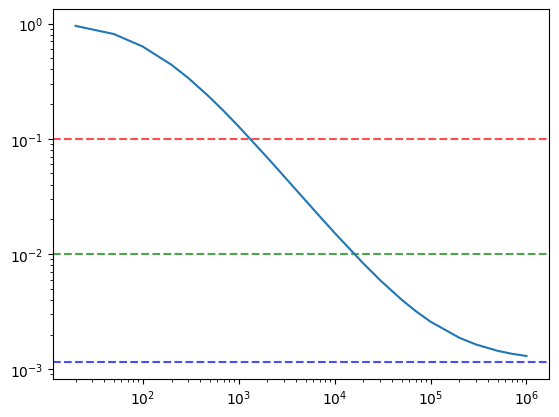

In [284]:
x = dec_times
y = [1-i for i in final_fidelities[1:]]

plt.axhline(y=0.1, color='r', linestyle='--', alpha=0.7, label='f = 0.1')
plt.axhline(y=0.01, color='g', linestyle='--', alpha=0.7, label='f = 0.01')
plt.axhline(y=1-final_fidelities[0], color='b', linestyle='--', alpha=0.7, label='Without noise')

plt.xscale('log')
plt.yscale('log')
plt.plot(x,y)

/var/folders/wh/28dwfv8x0qzfwl1_0pyzvs6h0000gp/T/ipykernel_51182/1548778352.py:59: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(y_min * 0.5, y_max * 2)


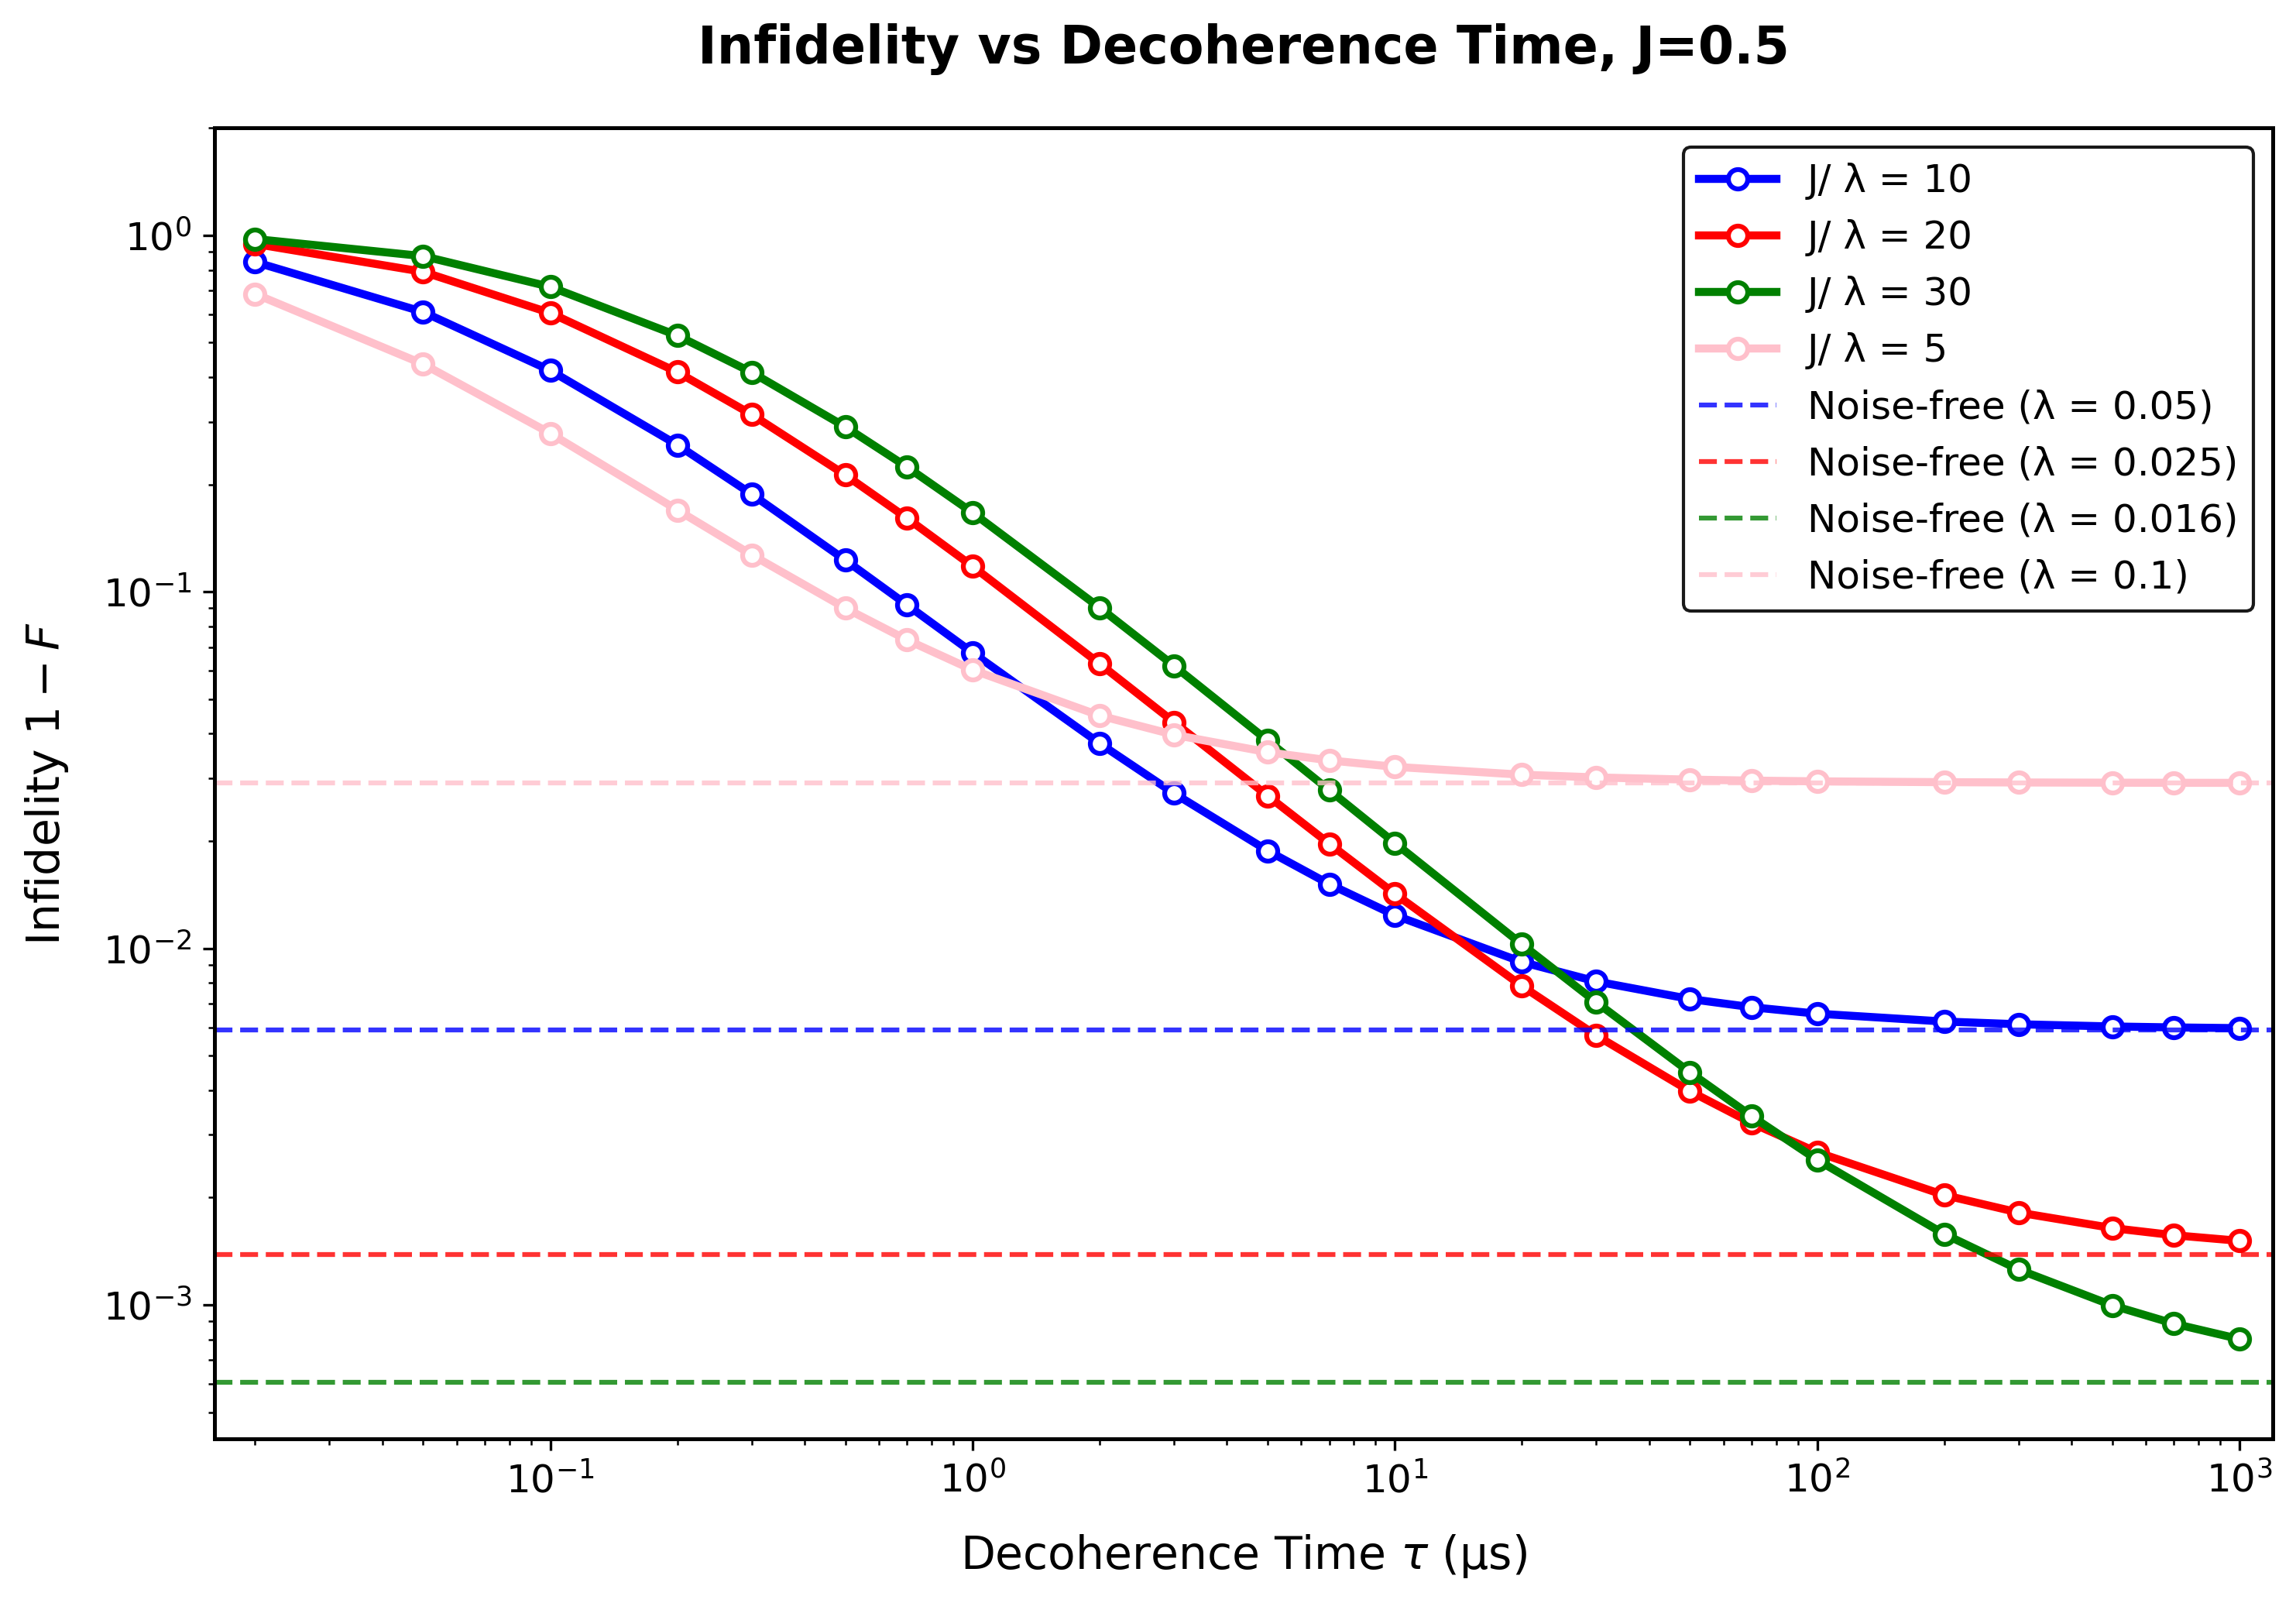

In [326]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with high resolution
plt.figure(figsize=(10, 7), dpi=300)

x = [i*0.001 for i in dec_times]
y = [1-i for i in final_fidelities[1:]]

# Plot main data with enhanced styling
plt.plot(x, x_10[1:], 'o-', color='blue', linewidth=2.5, markersize=6, 
         markerfacecolor='white', markeredgewidth=1.5, markeredgecolor="blue",
         label='J/ λ = 10')

plt.plot(x, x_20[1:], 'o-', color='red', linewidth=2.5, markersize=6, 
         markerfacecolor='white', markeredgewidth=1.5, markeredgecolor="red",
         label='J/ λ = 20')

plt.plot(x, x_30[1:], 'o-', color='green', linewidth=2.5, markersize=6, 
         markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='green',
         label='J/ λ = 30')

plt.plot(x, x_5[1:], 'o-', color='pink', linewidth=2.5, markersize=6, 
         markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='pink',
         label='J/ λ = 5')

# Add reference lines with better styling
plt.axhline(y=x_10[0], color='blue', linestyle='--', linewidth=1.5, alpha=0.8, label='Noise-free (λ = 0.05)')
plt.axhline(y=x_20[0], color='red', linestyle='--', linewidth=1.5, alpha=0.8, label='Noise-free (λ = 0.025)')
plt.axhline(y=x_30[0], color='green', linestyle='--', linewidth=1.5, alpha=0.8, label=f'Noise-free (λ = 0.016)')
plt.axhline(y=x_5[0], color='pink', linestyle='--', linewidth=1.5, alpha=0.8, label=f'Noise-free (λ = 0.1)')

# Set logarithmic scales
plt.xscale('log')
plt.yscale('log')

# Enhanced labels and title
plt.xlabel('Decoherence Time $\\tau$ (μs)', fontsize=14, labelpad=10)
plt.ylabel('Infidelity $1 - F$', fontsize=14, labelpad=10)
plt.title('Infidelity vs Decoherence Time, J=0.5', 
          fontsize=16, pad=20, fontweight='bold')

# Improve tick formatting
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Enhanced grid
# plt.grid(True, which='both', linestyle=':', alpha=0.4, color='gray')
# plt.grid(True, which='major', linestyle='-', alpha=0.2, color='black')

# Professional legend
plt.legend(fontsize=12, frameon=True, framealpha=0.9, 
          edgecolor='black', loc='best', fancybox=True)

# Set nice axis limits with some padding
x_min, x_max = min(x), max(x)
y_min, y_max = 0, 1
plt.xlim(x_min * 0.8, x_max * 1.2)
plt.ylim(y_min * 0.5, y_max * 2)

# Improve spine styling
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('black')

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [309]:
#x_20 = final_fidelities
x_20 = [1 - i for i in x_20]

In [308]:
#x_10 = final_fidelities
x_10 = [1 - i for i in x_10]

In [310]:
#x_30 = final_fidelities
x_30 = [1 - i for i in x_30]

In [323]:
x_5 = final_fidelities
x_5 = [1 - i for i in x_5]